In [17]:
%matplotlib inline

In [18]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.patches as mpatches

In [19]:
battles = pd.read_csv("data/battles.csv")
character_deaths = pd.read_csv("data/character-deaths.csv")
death_preds = pd.read_csv("data/character-predictions.csv")

# A look at the raw data...

In [20]:
pd.set_option('display.max_columns', None)
print(death_preds)

      S.No  actual  pred  alive   plod                  name  \
0        1       0     0  0.054  0.946  Viserys II Targaryen   
1        2       1     0  0.387  0.613           Walder Frey   
2        3       1     0  0.493  0.507          Addison Hill   
3        4       0     0  0.076  0.924           Aemma Arryn   
4        5       1     1  0.617  0.383        Sylva Santagar   
5        6       1     0  0.021  0.979      Tommen Baratheon   
6        7       0     0  0.014  0.986      Valarr Targaryen   
7        8       0     0  0.036  0.964   Viserys I Targaryen   
8        9       0     1  0.724  0.276               Wilbert   
9       10       1     0  0.391  0.609        Wilbert Osgrey   
10      11       0     0  0.167  0.833                  Will   
11      12       1     1  0.985  0.015         Will (orphan)   
12      13       1     1  0.813  0.187         Will (squire)   
13      14       1     1  0.747  0.253      Will (Standfast)   
14      15       1     1  0.705  0.295  

actual -- Is the character alive?

pred -- Prediction (seems to match alive >= 0.5); we'll ignore this field

alive -- The predicted probability of life; we'll ignore this field too

plod -- The predicted probability of death (1 - alive); also ignored

name -- It would be funny if it turned out GRRM killed off more characters with some specific syllable in their names.

title -- Maybe reformulate to broader categories? 

male -- Straightforward

culture -- Helpfully categorized here: https://www.kaggle.com/shaildeliwala/d/mylesoneill/game-of-thrones/exploratory-analysis

dateOfBirth -- How do we want to handle NaNs? Naive approach is setting it to 0 but since it's a regression variable that would be a bit weird.

dateOfDeath -- Same as above.

mother -- Lots of NaNs here as well. Maybe just have a category "Unknown"?

father -- Idem.

heir -- Idem. Maybe turn this into hasKnownHeir?

house -- Hahahaa. I predict this one has a big impact :P

spouse -- Same as heir.

book[1,2,3,4,5] -- Could be useful.

isAlive[Mother, Father, Heir, Spouse] -- So many NaN :(

isMarried -- Maybe? Twice the family relations, twice the chance of being involved in conflicts? lol.

isNoble -- Hmm.

age -- Relevant.

numDeadRelations -- Probably another one of those high-impact variables. XD "Oops all my friends died and I have no allies *dies*"

boolDeadRelations -- :D

isPopular -- Hmmm. I can imagine degree of popularity being a thing.

popularity -- :D

isAlive -- Redundant O_o"

# Some basic probability stuff

### How likely is it to die, in general?

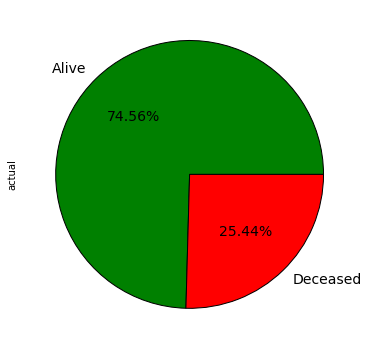

In [29]:
death_preds.actual.value_counts().plot.pie(labels = ["Alive", "Deceased"], \
                                               colors = ['g','r'], \
                                               autopct = "%.2f%%", \
                                               fontsize = 14., \
                                               figsize = (6,6))

We have imbalanced classes D: This can turn out very ugly because something like a linear regression might learn to just always predict the more common class.
Luckily, there are some things we can do about it.
http://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

### ... Okay, how does popularity affect this?

Looks like popularity is rare...

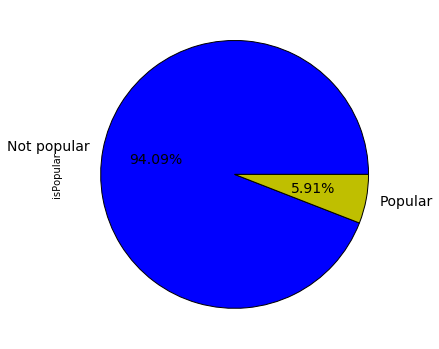

In [45]:
death_preds.isPopular.value_counts().plot.pie(labels = ['Not popular', 'Popular'],\
                                             colors = ['b','y'],\
                                             autopct = '%.2f%%',\
                                             fontsize = 14.,\
                                             figsize = (6,6))

But if you ARE popular, your chances of dying have just skyrocketed. Oops.

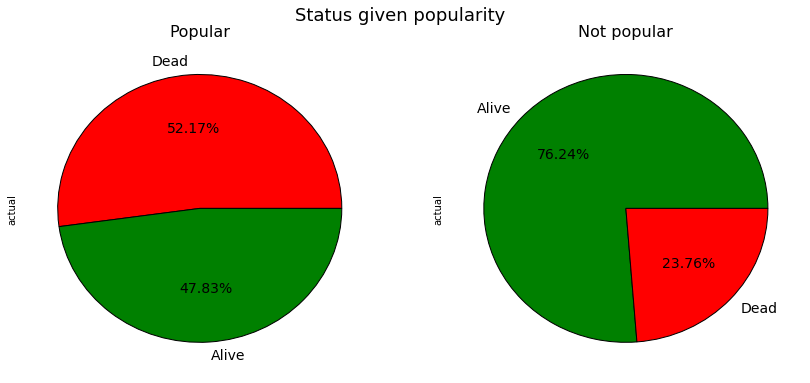

In [52]:
f, ax = plt.subplots(1, 2, figsize = (14, 6))
f.suptitle("Status given popularity", fontsize = 18.)
ax[0].set_title("Popular", fontsize = 16.)
ax[1].set_title("Not popular", fontsize = 16.)
_ = death_preds.loc[death_preds['isPopular'] == 1].actual.value_counts().plot.pie(labels = ['Dead','Alive'],\
                                                                                 colors = ['r','g'], \
                                                                                 autopct = '%.2f%%', \
                                                                                 fontsize = 14., \
                                                                                 ax = ax[0])
_ = death_preds.loc[death_preds['isPopular'] == 0].actual.value_counts().plot.pie(labels = ['Alive','Dead'],\
                                                                                 colors = ['g','r'], \
                                                                                 autopct = '%.2f%%', \
                                                                                 fontsize = 14., \
                                                                                 ax = ax[1])

Now I'm curious what a regression on degree of popularity and probability of death looks like...
Not caring about predictive accuracy, just want to see what the line of best fit for the overall data looks like.

(0, 1)

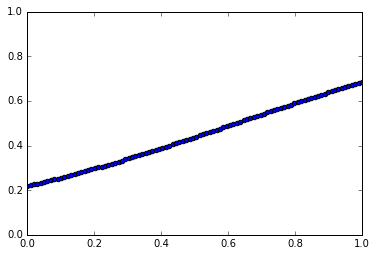

In [86]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
X = death_preds.popularity.values.reshape(-1,1)
y = death_preds.actual.values
lr.fit(X, y)
spots = np.linspace(0,1,100).reshape(-1,1)
probs = lr.predict_proba(spots)
plt.scatter(spots, probs[:,0])
plt.xlim(0,1)
plt.ylim(0,1)

And there you have it. More popular characters die more than their less favored brethren.

### And how do houses behave?

TBC because I have to finish grading assignments T_T